In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the purchasing behavior dataset
purchasing_df = pd.read_csv('purchasing_segment_data.csv')

# Load the website behavior dataset
website_df = pd.read_csv('websitebehavior_segment_data.csv')

# Ensure both datasets have a common column, e.g., 'CustomerID'
# Select only the required columns from each dataset
purchasing_df = purchasing_df[['CustomerID', 'PurchasingSegment', 'PurchaseAmount', 'PurchaseFrequency']]
website_df = website_df[['CustomerID', 'WebsiteBehaviorSegment', 'WebsiteVisits', 'TimeOnSite', 'BounceRate']]

# Merge the datasets on 'CustomerID'
merged_df = pd.merge(purchasing_df, website_df, on='CustomerID', how='inner')

# Create a new column for combined segments
merged_df['CombinedSegment'] = merged_df['PurchasingSegment'] + " & " + merged_df['WebsiteBehaviorSegment']

# Save the merged dataset to a new CSV file
merged_df.to_csv('merged_segment_data.csv', index=True)

print("Datasets successfully merged and saved as 'merged_segment_data.csv'")


Datasets successfully merged and saved as 'merged_segment_data.csv'


In [2]:
merged_df.head()

,CustomerID,PurchasingSegment,PurchaseAmount,PurchaseFrequency,WebsiteBehaviorSegment,WebsiteVisits,TimeOnSite,BounceRate,CombinedSegment
0,1,VIP Shopper,3607,11,Bouncers,6,11.28,53.33,VIP Shopper & Bouncers
1,2,Loyal Shopper,695,9,Active Visitors,19,12.50,40.56,Loyal Shopper & Active Visitors
2,3,VIP Shopper,3040,9,Casual Browsers,38,5.19,16.92,VIP Shopper & Casual Browsers
3,4,Loyal Shopper,1949,6,Bouncers,28,12.89,97.75,Loyal Shopper & Bouncers
4,5,Loyal Shopper,2554,6,Bouncers,2,11.86,85.33,Loyal Shopper & Bouncers


In [3]:
segment_counts = merged_df['CombinedSegment'].value_counts()
segment_counts
segment_counts.to_csv('combined_segment.csv', index=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4876\3867803773.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')


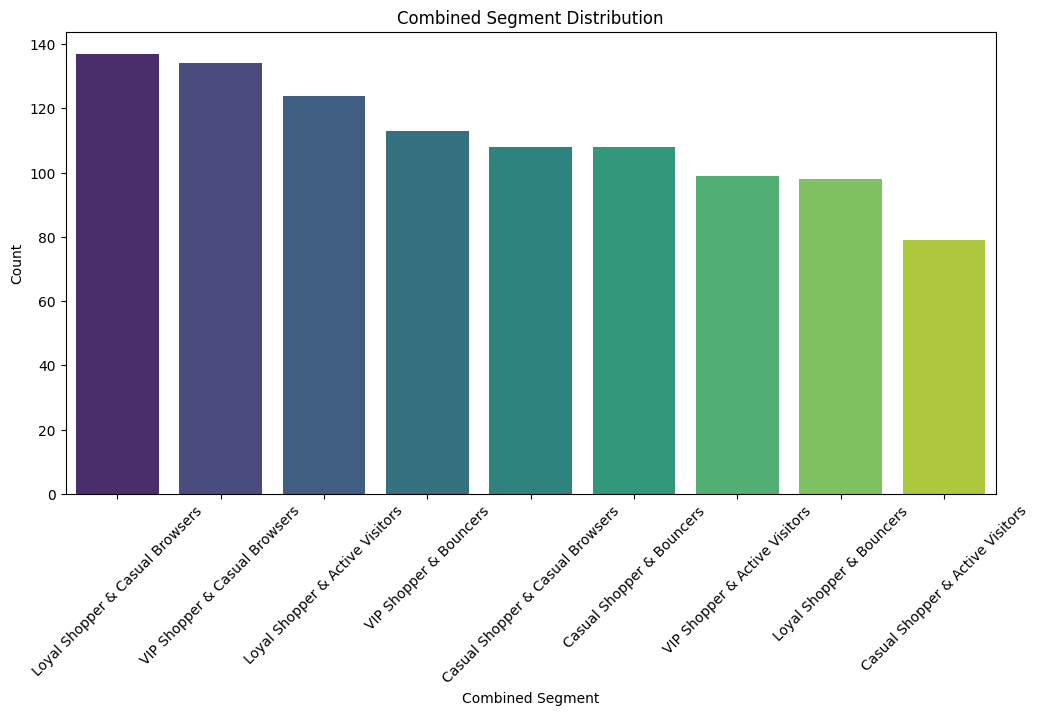

In [4]:

# Bar plot for segment distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Combined Segment Distribution')
plt.ylabel('Count')
plt.xlabel('Combined Segment')
plt.xticks(rotation=45)
plt.show()

In [5]:
# Step 3: Correlation Analysis 
# Aggregate average website metrics and purchase metrics by combined segment
segment_analysis = merged_df.groupby('CombinedSegment').agg({
    'WebsiteVisits': 'mean',
    'TimeOnSite': 'mean',
    'BounceRate': 'mean',
}).reset_index()


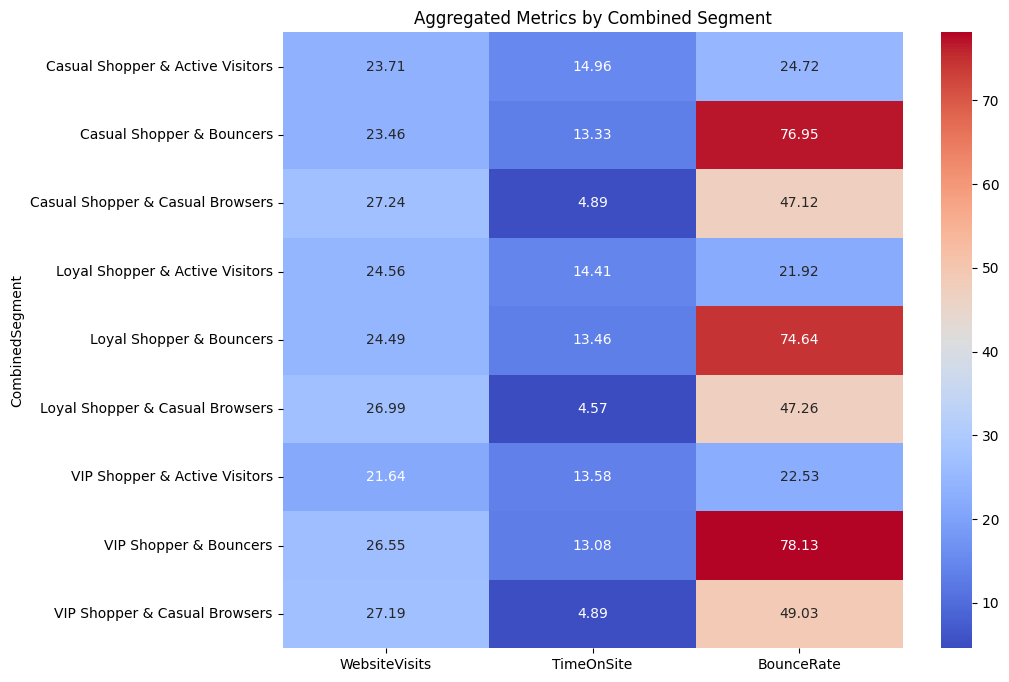

In [6]:
# Heatmap of aggregated metrics
plt.figure(figsize=(10, 8))
sns.heatmap(segment_analysis.set_index('CombinedSegment'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Aggregated Metrics by Combined Segment')
plt.savefig('combined_segment_metrics.jpg')
plt.show()


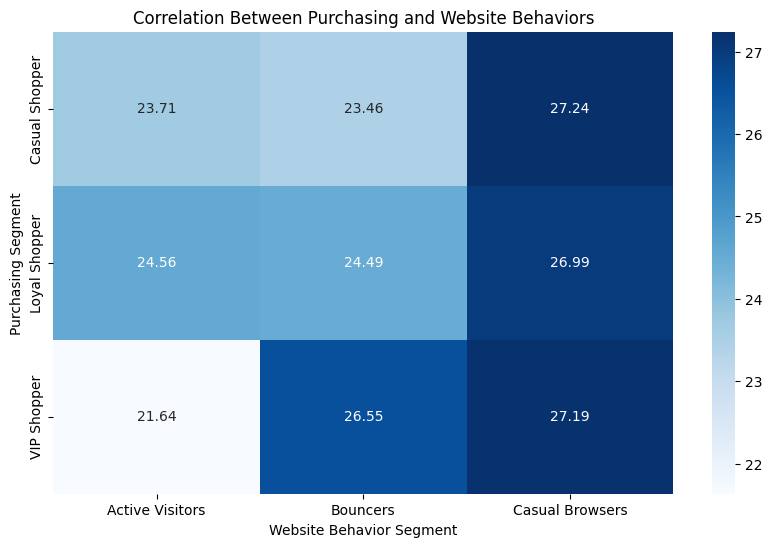

In [7]:
# Step 4: Generate Insights
# Pivot table to visualize purchase behavior against website behavior
pivot_table = pd.pivot_table(merged_df, 
                             values='WebsiteVisits', 
                             index='PurchasingSegment', 
                             columns='WebsiteBehaviorSegment', 
                             aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Between Purchasing and Website Behaviors')
plt.xlabel('Website Behavior Segment')
plt.ylabel('Purchasing Segment')
plt.savefig('combined_segment_correlation.png')
plt.show()

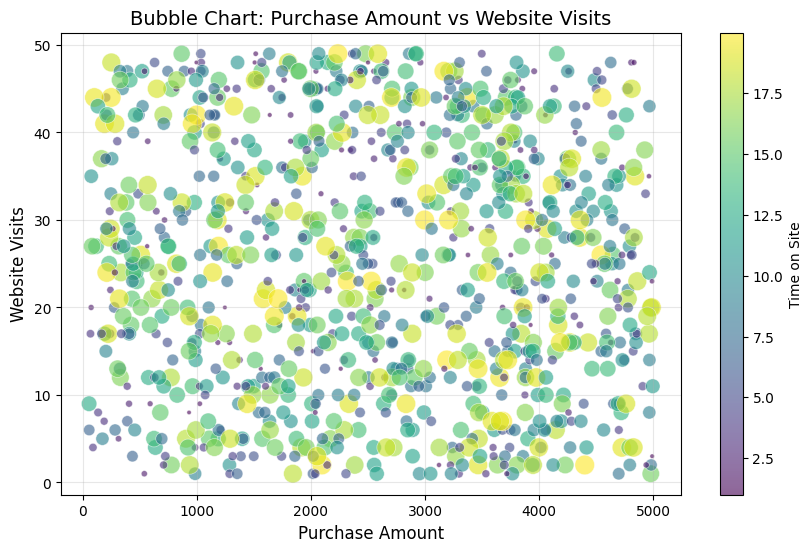

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your merged dataset
data = pd.read_csv('merged_segment_data.csv')

# Ensure relevant columns exist in the dataset

    # Create a bubble chart
plt.figure(figsize=(10, 6))
bubble_size = data['TimeOnSite'] * 10  # Scale the bubble size for better visualization
    
scatter = plt.scatter(
        data['PurchaseAmount'], 
        data['WebsiteVisits'], 
        s=bubble_size, 
        alpha=0.6, 
        c=data['TimeOnSite'], 
        cmap='viridis', 
        edgecolors='w', 
        linewidth=0.5
    )
    
    # Add a color bar to indicate time on site
colorbar = plt.colorbar(scatter)
colorbar.set_label('Time on Site')
    
 # Add titles and labels
plt.title('Bubble Chart: Purchase Amount vs Website Visits', fontsize=14)
plt.xlabel('Purchase Amount', fontsize=12)
plt.ylabel('Website Visits', fontsize=12)
plt.grid(alpha=0.3)
    
    # Show plot
plt.savefig('bubblechart.png')
plt.show()

